# Easy Report Intro to Machine Learning Project
- Nama = Riyan Zaenal Arifin
- Email = riyanzaenal411@gmail.com

## Intoduction

Pecemaran udara meupakan hal yang lumrah di kota besar seperti di Jakarta untuk saat ini. Polusi udara di Jakarta disebabkan karena banyaknya penduduk yang masih mengandalkan transportasi berbahan bakar fosil dalam berpergian. Selain itu, polusi udara juga disebabkan oleh pabrik-pabrik di sekitar Jakarta, sehingga polusi udara di Jakarta semakin parah. Bahkan Jakarta masuk dalam kota yang memilki tingkat polusi udara paling tinggi di dunia. Sehingga penulis termotivasi untuk membantu untuk memprediksi kondisi udara melalui beberapa kriteria menggunakan model machine leraning, lalu model machine learning dapat memprediksi kondisi udara, apakah baik atau tidak baik. Untuk model machine learning yang digunakan adalah KNN. Sebelum pemodelan machine learning juga dilakukan proses preprocessing, feature engineering, label encoder, balancing data menggunakan over sampling, dan lain-lain, sehingga bisa diperoleh model yang optimal. Dengan begitu, model machine learning tersebut bisa diaplikasikan untuk memudahkan dalam mengetahui kondisi udara di jakarta, sehingga dapat diperoleh untuk pengambilan keputusan yang lebih lanjut dari pihak pemerintah dalam menangani polusi udara di Jakarta.

## Related Work

- https://journal.universitasmulia.ac.id/index.php/metik/article/view/343

    Data relatif sangat sedikit, yakni hanya 25 saja. Tidak dijelaskan dalam proses preprocessing data. Selain itu tidak dijelaskan features nya apa saja dan pemabgian data training dan validationnya. Tahap deployment menggunakan framework django sudah sesuai.
- https://jurnal-backup.kaputama.ac.id/index.php/JTIK/article/view/790

    Tidak dijelaskan jumlah, features dan sumber datanya. Menggunakan cross validation, tetapi akurasi tidak dirata-ratakan dari berapa kali percobaan K-Fold, hanya diambil nilai akurasi tertinggi. Tidak diketahui akurasi data training, sehingga tidak bisa dipastikan apakah model overfiting atau tidak.
- https://www.jurnal.yoctobrain.org/index.php/ijodas/article/view/11

    Tidak dijelaskan features dan sumber datanya. Tidak dijelaskan tahap preprocessingnya. Jumlah data terlalu sedikit dan hasil evaluasi kurang bagus menandakan model underfiting. Selain itu juga dijelaskan pemahaman mengenai evaluasi model
- https://ejournal.bsi.ac.id/ejurnal/index.php/evolusi/article/view/12514/5403

    Tidak diketahui pasti terkait sumber datanya. Penjelasan terkait perhitungan jarak tetangga KNN hanya euclidean distance saja. Selebihnya juga sudah bagus. Terdapat perbadningan evaluasi data training dan data validation
- https://jurnal.umk.ac.id/index.php/simet/article/view/2882

    Jumlah data relatif banyak, sampai puluhan ribu. Hampir keseluruhan sudah baik. Menggunakan cross validation, tetapi tidak diketahu hasil evaluasi data validation, sehingga tidak diketahui apakah model mengalami overfiting atau tidak.

## Dataset and Features

Dataset yang digunakan berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021 Penjelasan features dari dataset sebagai berikut : 
- tanggal : Tanggal pengukuran kualitas udara 
- pm10 : Partikulat salah satu parameter yang diukur 
- pm25 : Partikulat salah satu parameter yang diukur 
- so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur 
- co : Carbon Monoksida salah satu parameter yand diukur 
- o3 : Ozon salah satu parameter yang diukur 
- no2 : NItrogen dioksida salah satu parameter yang diukur 
- max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama 
- critical : Parameter yang hasil pengukurannya paling tinggi 
- categori : Kategori hasil perhitungan indeks standar pencemaran udara 
- location : Kode lokasi

Data Source : https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021

Berikut langkah-langkah dalam prerpocessing data :

In [309]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [308]:
#import dataset
df_jan = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2021.csv')
df_feb = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2021.csv')
df_mar = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2021.csv')
df_apr = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2021.csv')
df_mei = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2021.csv')
df_juni = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2021.csv')
df_juli = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2021.csv')
df_agust = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2021.csv')
df_sept = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2021.csv')
df_okto = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2021.csv')
df_nov = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2021.csv')
df_desm  = pd.read_csv('/home/riyan/IntroML/Dataset/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2021.csv')

#integrate column name juni and juli
df_juni.columns = df_desm.columns
df_juli.columns = df_desm.columns

#concate dataset
dataset = pd.concat([df_jan, df_feb, df_mar, df_apr, df_mei,df_juni,df_juli,df_agust,df_sept,df_okto,df_nov,df_desm])
dataset



,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
150,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
151,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
152,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
153,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


### Preprocessing data

#### Normalisasi data

In [310]:
dataset['categori'].value_counts()

categori
SEDANG            1349
TIDAK SEHAT        272
BAIK               187
TIDAK ADA DATA      16
Name: count, dtype: int64

In [311]:
#rename value SEDANG to BAIK in column categori
dataset['categori'] = dataset['categori'].replace(['SEDANG'], 'BAIK')
dataset['categori'].value_counts()

categori
BAIK              1536
TIDAK SEHAT        272
TIDAK ADA DATA      16
Name: count, dtype: int64

#### Feature Enginnering

Data tanggal tidak digunakan dalam kasus klasifikasi, sehingga bisa dihapus

In [312]:
dataset = dataset.drop(['tanggal'], axis=1)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,BAIK
1,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,BAIK
3,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...
150,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,BAIK
151,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,BAIK
152,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,BAIK
153,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,BAIK


#### Label encoder

Agar lebih optimal dalam balancing data menggunakan oversampler dan pada saat pemodelan, data kategori lebih baik diubah menjadi angka 

In [313]:
label_encoder = preprocessing.LabelEncoder()

#kolom stasiun
dataset['stasiun']= label_encoder.fit_transform(dataset['stasiun'])

#kolom critical
dataset['critical']= label_encoder.fit_transform(dataset['critical'])

#kolom categori
dataset['categori'] = dataset['categori'].replace(['BAIK', 'TIDAK SEHAT'],[1, 0])

dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,38,53,29,6,31,13,53,4,1
1,0,27,46,27,7,47,7,47,2,1
2,0,44,58,25,7,40,13,58,4,1
3,0,30,48,24,4,32,7,48,4,1
4,0,38,53,24,6,31,9,53,4,1
...,...,...,...,...,...,...,...,...,...,...
150,4,54,76,36,14,21,47,76,4,1
151,4,44,68,20,11,21,33,68,4,1
152,4,34,54,28,8,25,29,54,4,1
153,4,53,75,25,15,23,44,75,4,1


#### Data Cleansing

##### Remove missing value

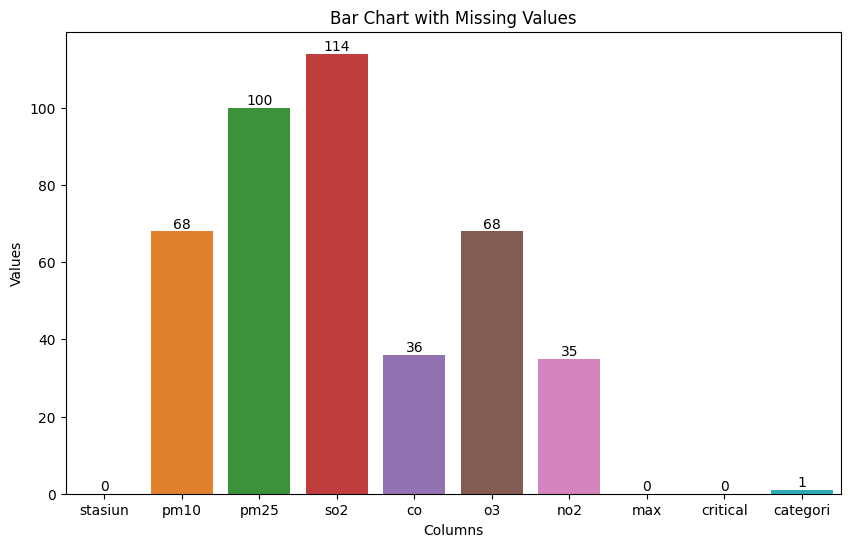

In [314]:
#definisikan nilai missing yang kemungkinan terjadi
missing_values = ['', ' ', 'NaN', 'Nan', 'nan', '.', ',','---']
col_names = list(dataset.columns)
dataset[col_names] = dataset[col_names].replace(missing_values, np.nan)

# Count the missing values in each column
missing_values = dataset.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['count'])
missing_values.reset_index(inplace=True)
#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='index', y='count', data=missing_values)
plt.bar_label(ax.containers[0])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Bar Chart with Missing Values')

# Show the plot
plt.show()

Untuk memastikan keorisinilan data, data yang missing akan dihapus, tidak dilakukan imputasi

In [315]:
#drop missing value
dataset = dataset.dropna()
dataset.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

##### Balancing data

Perlu diketahui juga bahwa untuk balancing data bisa menggunakan 3 metode, yaitu udersampling(kategori yang paling banyak akan disamakan dengan cara menurunkan jumlah datanya sebanyak kategori yang paling sedikit), oversampling(kategori yang paling sedikit akan disamakan dengan cara menambahkan jumlah datanya sebanyak kategori yang paling banyak) dan SMOTE (mirip seperti oversapling, namun dalam penambahan datanya mirip cara kerja KNN, yaitu akan mengambil sample acak, lalu akan dipilih tetangga terdekat). Teknik balancing data seperti oversampling dan SMOTE tidak serta merta membuat data langsung balace dengan bertambahnya data, kemungkinan terdapat data yang duplikat, sehingga perlu dicek duplikasi datanya. Teknik balancing ini umumnya untuk membantu mengurangi ketidakseimbangan data yang cukup signifikan.

[Text(0, 0, '245'), Text(0, 0, '1272')]

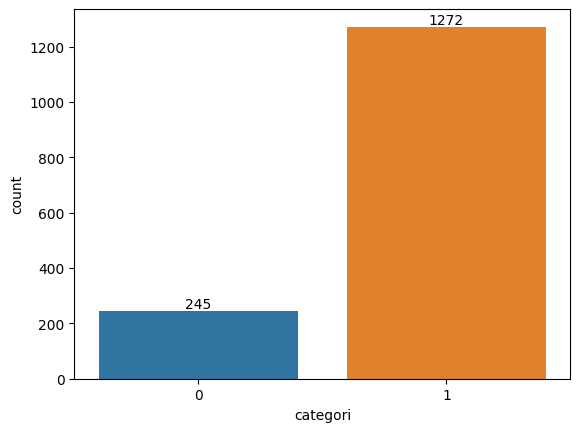

In [316]:
# Check distribution of our label data
ax = sns.countplot(data = dataset, x = "categori", label = dataset["categori"].unique())
ax.bar_label(ax.containers[0])

In [317]:
#replace type data object to int
dataset = dataset.astype(int)

#smote
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(dataset.iloc[:,:-1], dataset.iloc[:,-1:])
dataset = pd.concat([X_res, y_res], axis=1)
dataset.duplicated().sum()
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,38,53,29,6,31,13,53,4,1
1,0,27,46,27,7,47,7,47,2,1
2,0,44,58,25,7,40,13,58,4,1
3,0,30,48,24,4,32,7,48,4,1
4,0,38,53,24,6,31,9,53,4,1
...,...,...,...,...,...,...,...,...,...,...
2539,3,56,102,28,16,18,29,102,4,0
2540,3,58,103,40,8,25,20,103,4,0
2541,3,73,137,35,10,29,20,137,4,0
2542,0,68,102,26,14,27,19,102,4,0


[Text(0, 0, '1272'), Text(0, 0, '1272')]

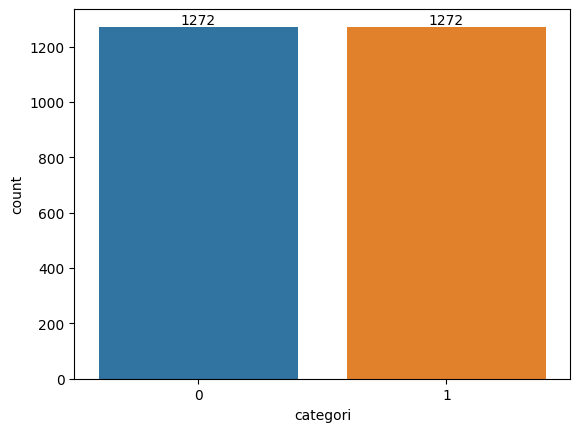

In [318]:
# Check distribution of our label data
ax = sns.countplot(data = dataset, x = "categori", label = dataset["categori"].unique())
ax.bar_label(ax.containers[0])

##### Check duplicate data

[Text(0, 0, '105'), Text(0, 0, '0')]

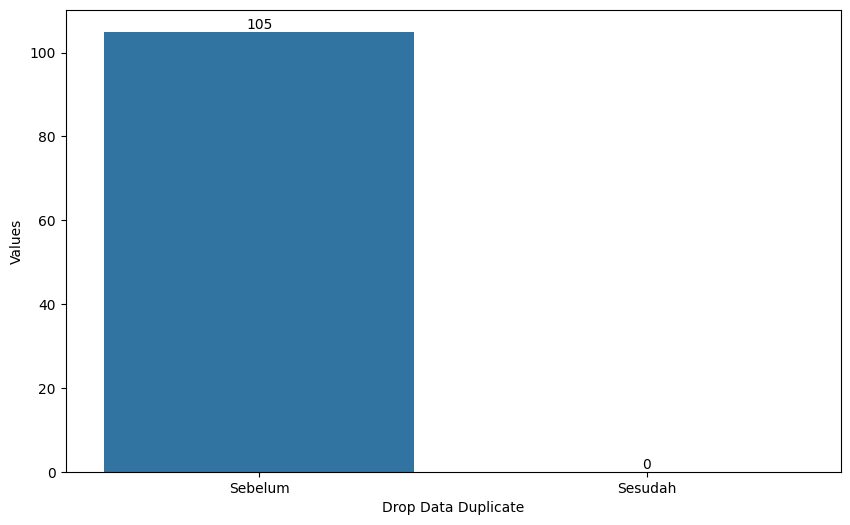

In [319]:
sebelum = dataset.duplicated().sum()
dataset = dataset.drop_duplicates()
sesudah = dataset.duplicated().sum()

drop_dup = {
    'Drop Data Duplicate': ['Sebelum', 'Sesudah'],
    'Values': [sebelum,sesudah],
}

# Create a DataFrame from the dictionary
drop_dup = pd.DataFrame(drop_dup)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Drop Data Duplicate', y='Values', data=drop_dup)
plt.bar_label(ax.containers[0])

[Text(0, 0, '1167'), Text(0, 0, '1272')]

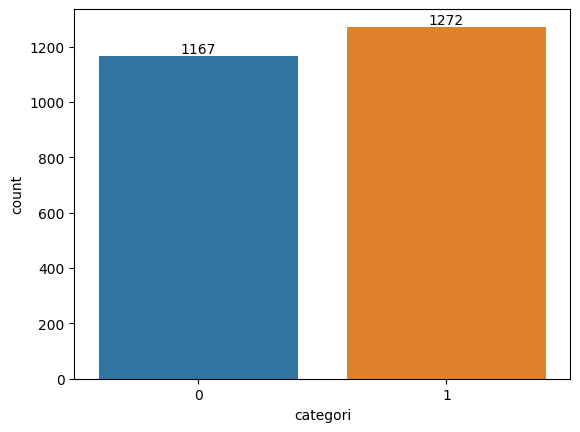

In [320]:
# Check distribution of our label data
ax = sns.countplot(data = dataset, x = "categori", label = dataset["categori"].unique())
ax.bar_label(ax.containers[0])

#### Model

##### Spliting data

In [321]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [322]:
#spliting data training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

#spliting data training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42, stratify = y_train)


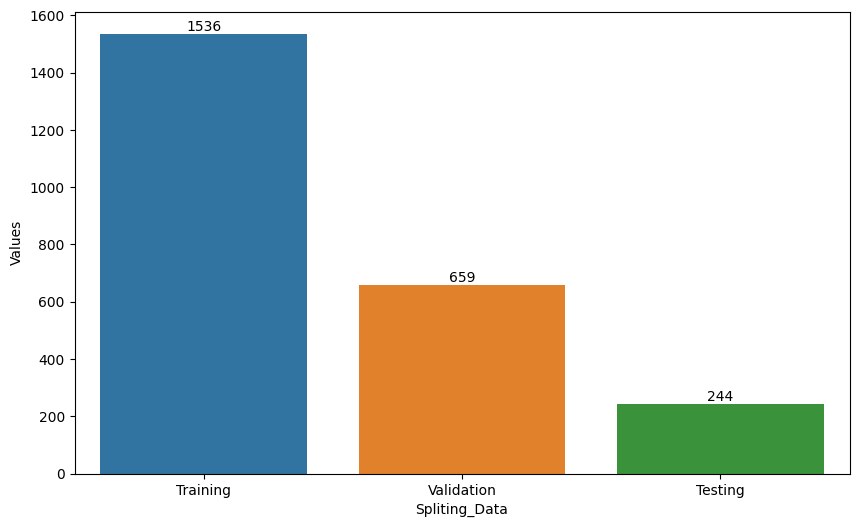

In [323]:
data_split = {
    'Spliting_Data': ['Training', 'Validation', 'Testing'],
    'Values': [len(x_train),len(x_val),len(x_test)],
}

# Create a DataFrame from the dictionary
data_split = pd.DataFrame(data_split)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Spliting_Data', y='Values', data=data_split)
plt.bar_label(ax.containers[0])

# Show the plot
plt.show()


## Metode

Metode yang digunakan adalah KNN:

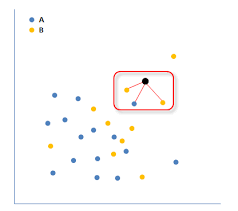

KNN(K-Nearst Neigbors) merupakan salah satu algoritma machine learning yang memiliki cara kerja mengambil nilai rata-rata jarak (nilai K) tetangga terdekat. Misal suatu suatu data akan mengambil 5 data terdekat (nilai K), maka data tersebut akan menghitung jarak seluruh data yang ada, lalu dipilih 5 tetangga terdekat, lalu hitung nilai setiap kategori dari tetangga 5 tetangga terdekat tersebut, selanjutnya akan dipilih kategori yang memilki nilai paling banyak. Untuk nilai K bisa diatur sedemikian rupa sesuai keinginan. Namun, agar tidak menhindari bias pada model, biasanya untuk nilai K disarankan harus bernilai ganjil. Dalam penghitungan jarak pada KNN, terdapat 2 metode, yaitu dengan euclidean distance dan manhattan distance. Euclidean distance akan menghitung antar 2 titik data secara garis lurus dengan theorema pythgoras. Sedangkan manhattan distance akan menghitung jarak antara dua titik dalam ruang dengan menghitung perbedaan absolut antara koordinat data. 

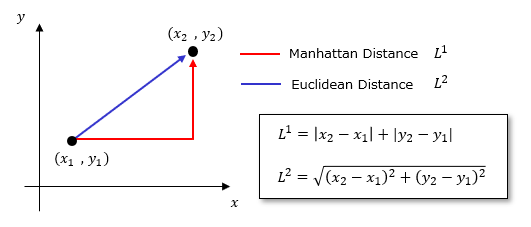

Dalam penulis ini, penulis memilih algoritma KNN karena jumlah data yang digunakan tidaklah terlalu banyak, sehingga proses akan training akan lebih cepat. Karena kelemahan algoritma KNN sendiri yaitu KNN akan menghitung jarak satu-satu data training, semakin banyak data training akan semakin membutuhkan waktu yang sangat lama. 

## Experiments/Result/Discussion

##### Experiments

In [324]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

/home/riyan/miniconda3/envs/mlprocess_venv1/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

##### Result

###### Evaluation data validation

Accuracy: 0.9833080424886191
Precision: 0.9940652818991098
Recall: 0.9738372093023255
F1 score: 0.9838472834067548


[Text(0, 0, '0.983308'),
 Text(0, 0, '0.994065'),
 Text(0, 0, '0.973837'),
 Text(0, 0, '0.983847')]

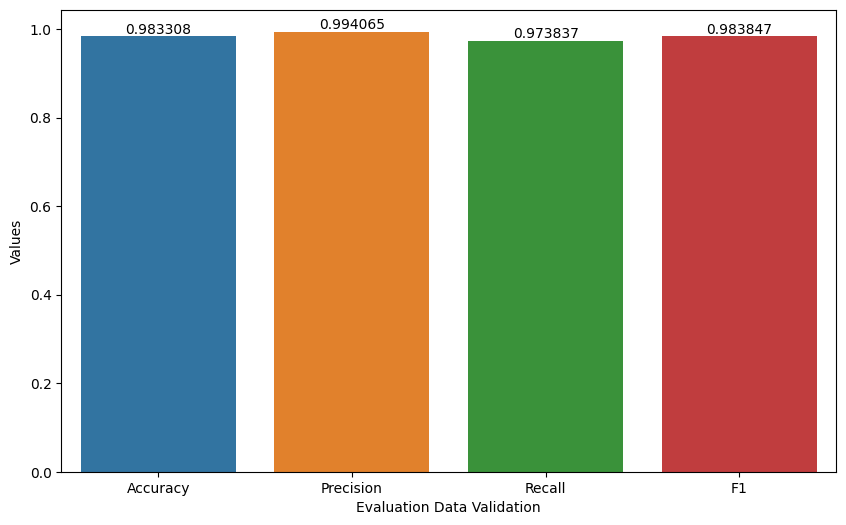

In [325]:
# Calculating accuracy
y_pred_val = knn.predict(x_val)

#
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_val, y_pred_val)
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_val, y_pred_val)
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_val, y_pred_val)
print("F1 score:", f1)

eval_val = {
    'Evaluation Data Validation': ['Accuracy', 'Precision', 'Recall','F1'],
    'Values': [accuracy,precision,recall,f1],
}

# Create a DataFrame from the dictionary
eval_val = pd.DataFrame(eval_val)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Evaluation Data Validation', y='Values', data=eval_val)
plt.bar_label(ax.containers[0])

In [326]:
#sification_report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       315
           1       0.99      0.97      0.98       344

    accuracy                           0.98       659
   macro avg       0.98      0.98      0.98       659
weighted avg       0.98      0.98      0.98       659



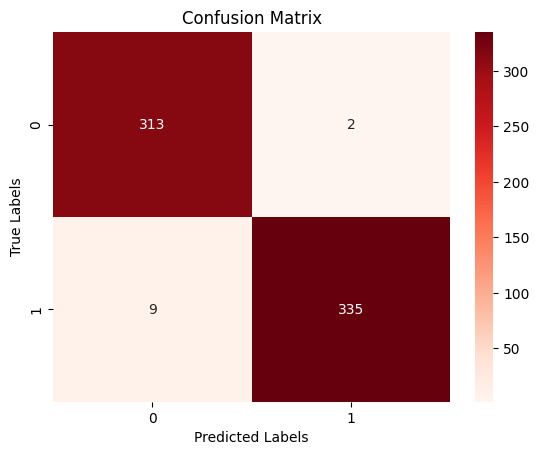

In [327]:
# Create confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)

# Plot confusion matrix
sns.heatmap(cm_val, annot=True, fmt="d", cmap=plt.cm.Reds)

# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###### Evaluation Data training

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


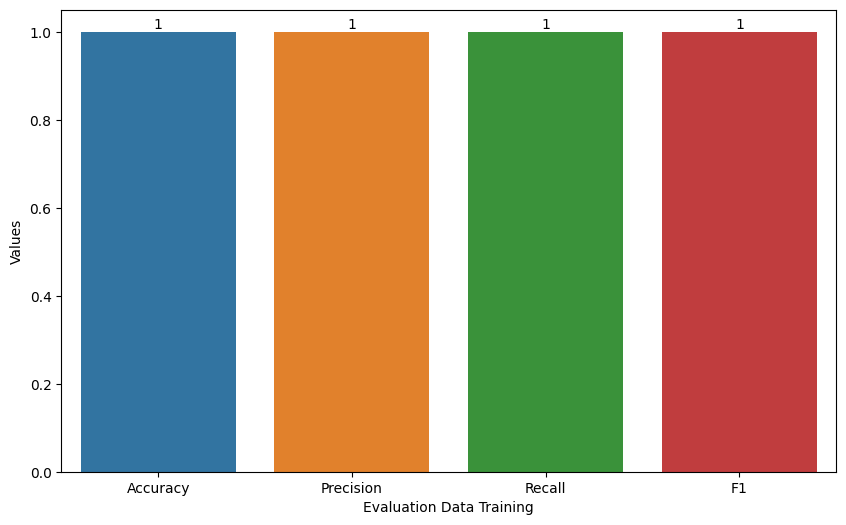

In [328]:
# Calculating accuracy
y_pred_train = knn.predict(x_train)

#
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)

eval_train = {
    'Evaluation Data Training': ['Accuracy', 'Precision', 'Recall','F1'],
    'Values': [accuracy,precision,recall,f1],
}

# Create a DataFrame from the dictionary
eval_train = pd.DataFrame(eval_train)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Evaluation Data Training', y='Values', data=eval_train)
plt.bar_label(ax.containers[0])

# Show the plot
plt.show()

In [329]:
#sification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       801

    accuracy                           1.00      1536
   macro avg       1.00      1.00      1.00      1536
weighted avg       1.00      1.00      1.00      1536



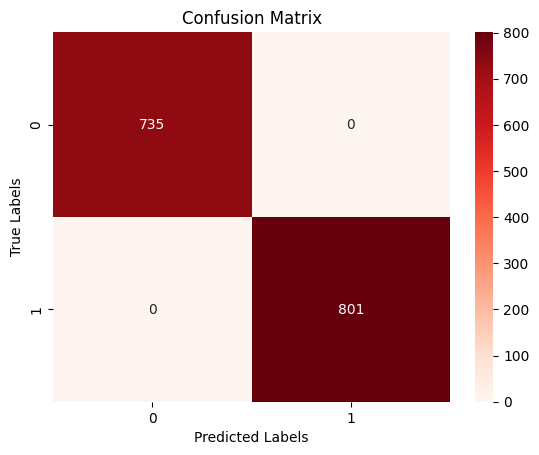

In [330]:
# Create confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# Plot confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap=plt.cm.Reds)

# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [331]:
#predict data testing
x_test["predict_categori"] = knn.predict(x_test)
x_test

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,predict_categori
2188,3,57,102,27,15,20,28,102,4,0
290,2,65,106,31,12,45,17,106,4,0
1278,0,55,72,30,13,22,40,72,4,1
1263,3,52,80,41,18,31,23,80,4,1
911,0,32,50,25,7,29,16,50,4,1
...,...,...,...,...,...,...,...,...,...,...
1589,2,72,108,48,11,29,15,108,4,0
1617,4,60,104,25,14,24,26,104,4,0
638,0,65,90,31,17,17,39,90,4,1
652,1,70,99,53,14,72,23,99,4,0


In [332]:
y_test

,categori
2188,0
290,0
1278,1
1263,1
911,1
...,...
1589,0
1617,0
638,1
652,1


##### Discussion
Berdasarkan hasil model di atas, sudah dilakukan pengujian untuk nilai K 1, 3, 5, dan 7. Namun semakin kecil nilai K hasil evaluasi mayoritas meningkat, sehingga dipilih K = 1. Selain itu model juga tidak mengalami overfiting karena hasil selisih evaluasi untuk data validation dan data training tidaklah terlalu signifikan. Model juga tidak mengalami underfiting karena mayoritas hasil evaluasi baik di data training dan data validation sudah mendekati 100 persen. Sehingga bisa dikatakan bahwa model tersebut sudah berhasil untuk memprediksi kondisi udara di Jakarta.

## Conclusion/Future Work

### Conclusion 
Pengetahuan mengenai preprocessing data meruapakan hal yang sangat penting karena dapat mempengaruhi proses training model. Preprocessing data yang baik dan tepat sesuai kondisi data dapat meningkatkan performa model. Jumlah data juga sangat berpengaruh dalam proses training. Data yang digunakan dalam project ini relatif masih sedikit, namun kedepannya bisa menggunakan data yang lebih banyak lagi. Hasil evaluasi menunjukan bahwa performa terbaik berada di K = 1, setelah dilakukan percobaan nilai K dari {1,3,5,7}. Walaupun begitu model tersebut sudah relatif sangat baik karena mendekati 100% baik di data validation data training sehingga bisa untuk diimplementasikan ke tahap deployment.

### Future Work
Jika saya memilki waktu yang lebih, sudah memilki komputer yang super dalam menjalankan komputasi dan sudah ada rezeki saya akan mengikuti bootcamp mengenai computer vision, lebih mengarah ke deep learning. Saya akan mencoba bagaimana memproses data baik data gambar, suara, maapun video dan memodelkannya menjadi ke deep learning sampai ke tahap deployment